# **PERESYS**
## **(Sistema de recomendación de películas)**

Este proyecto de Machine Learning parte de la información contenida en dos datasets, ambos autorizados de manera pública con fines educativos: 

**TMDB 5000 Movie Dataset https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata**

*This dataset was generated from The Movie Database API (https://www.kaggle.com/code/sohier/getting-imdb-kernels-working-with-tmdb-data). This product uses the TMDb API but is not endorsed or certified by TMDb. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. You can try it for yourself here. (https://gist.github.com/SohierDane/4a84cb96d220fc4791f52562be37968b)*

El dataset se distribuye en los siguientes csv: tmdb_5000_movies.csv tmdb_5000_credits.csv

- 'tmdb_5000_movies.csv' incluye las variables: budget, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies,          production_countries, release_date, revenue, runtime ,spoken_languages, status, tagline, title, vote_average, vote_count <br>
- 'tmdb_5000_credits.csv' incluye las variables: movie_id, title, cast, crew <br>


**Movie Lens 32M https://grouplens.org/datasets/movielens/32m/**

*MovieLens 32M movie ratings. Stable benchmark dataset. 32 million ratings and two million tag applications applied to 87,585 movies by 200,948 users. Collected 10/2023 Released 05/2024 • README.txt • ml-32m.zip (size: 239 MB, checksum) Permalink: https://grouplens.org/datasets/movielens/32m/*

El dataset se reparte en los siguientes csv: movies.csv ratings.csv links.csv tags.csv

'links.csv' incluye variables: movieId, imdbId, tmdbId <br>
'movies.csv' incluye variables: movieId, title, genres <br>
'ratings.csv' incluye variables: userId, movieId, rating, timestamp <br>
'tags.cs'v' 'incluye variables: userId, movieId, tag, timestamp <br>

In [3]:
# Importo librerías iniciales
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

## **Preprocesado parte 1 - Dataset tmdb_5000**

In [4]:
# Asigno variables a los csv principales que voy a utilizar para esta primera parte del preprocesado
moviestmdb_df = pd.read_csv('../data/01_raw/tmdb_5000/tmdb_5000_movies.csv')
creditstmdb_df = pd.read_csv('../data/01_raw/tmdb_5000/tmdb_5000_credits.csv')

In [5]:
moviestmdb_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [6]:
creditstmdb_df

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [7]:
print(creditstmdb_df[creditstmdb_df['movie_id'] == 862])

      movie_id      title                                               cast  \
1541       862  Toy Story  [{"cast_id": 14, "character": "Woody (voice)",...   

                                                   crew  
1541  [{"credit_id": "52fe4284c3a36847f8024f55", "de...  


In [8]:
moviestmdb_df = moviestmdb_df.merge(creditstmdb_df,on='title')

In [9]:
moviestmdb_df.shape

(4809, 23)

In [10]:
moviestmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [11]:
moviestmdb_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [12]:
moviestmdb_df.values

array([[237000000,
        '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
        'http://www.avatarmovie.com/', ..., 19995,
        '[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "cha

In [13]:
print(moviestmdb_df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


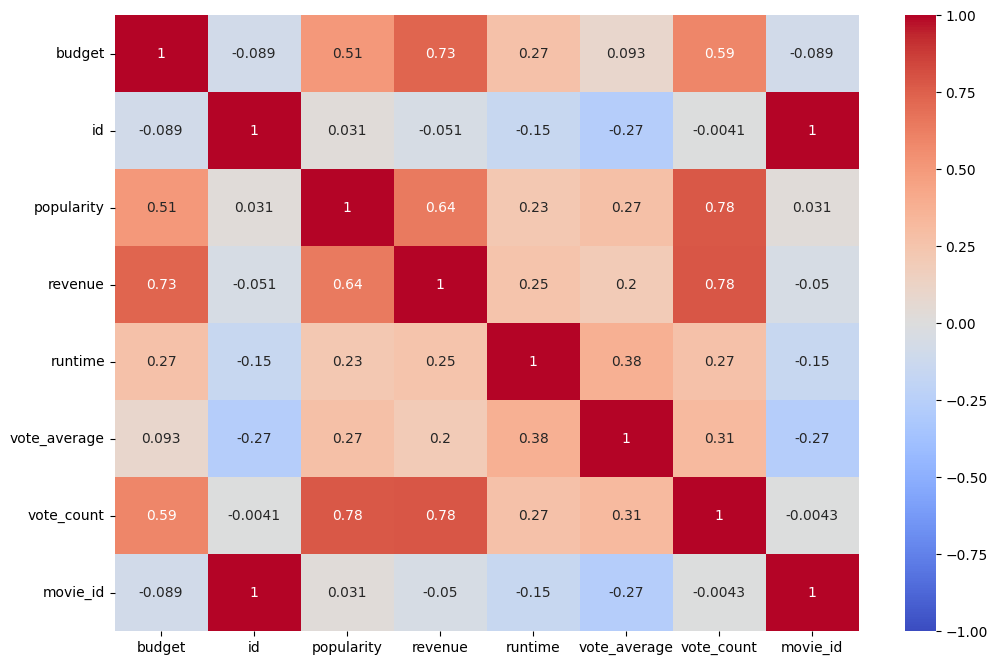

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(moviestmdb_df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmax=1, vmin=-1);

Viendo el mapa de calor puedo extraer las siguiente **correlaciones**: <br>
- **Correlaciones positivas fuertes (corr > 0.7)**: 'budget' y 'revenue', 'popularity' y 'vote_count', 'revenue' y 'vote_count'. <br>
- **Correlaciones positivas moderadas (0.3 > corr < 0.7)**: 'budget' y 'popularity', 'budget' y 'vote_count', 'popularity' y 'revenue', 'runtime' y 'vote_average', 'vote_average' y 'vote_count'.

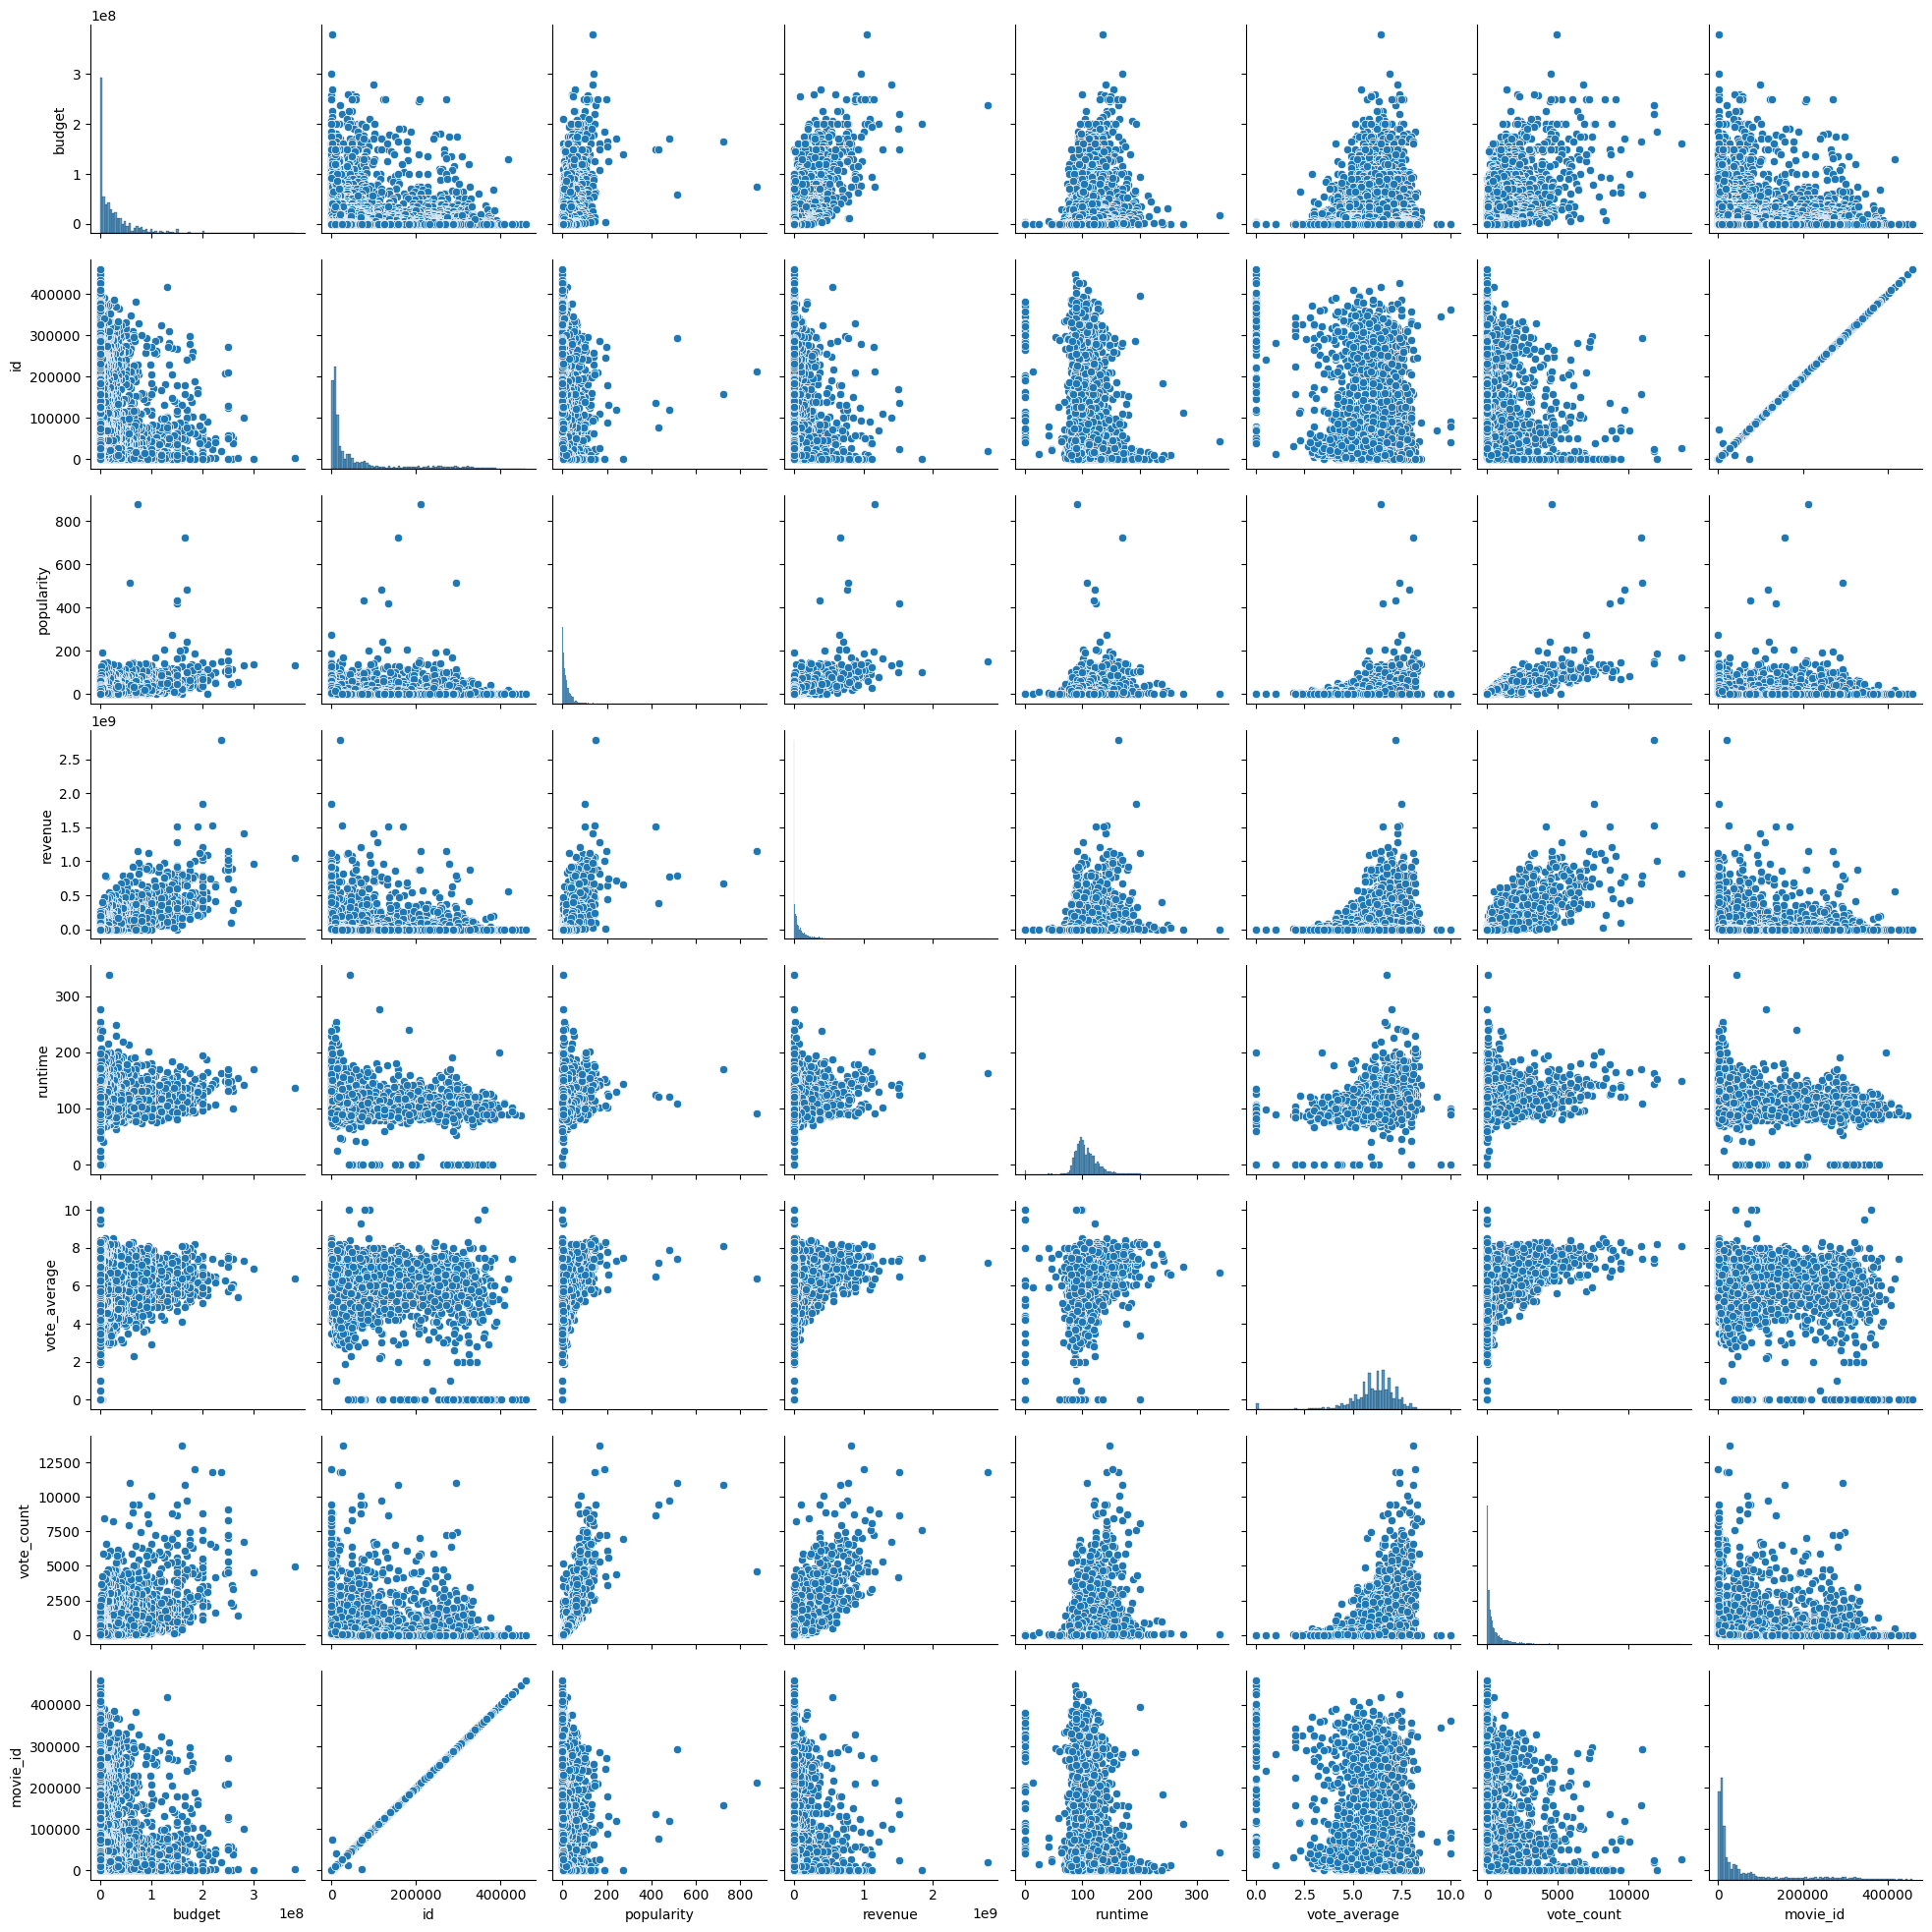

In [15]:
sns.pairplot(moviestmdb_df);

#### **Relación entre 'budget' y 'revenue'**

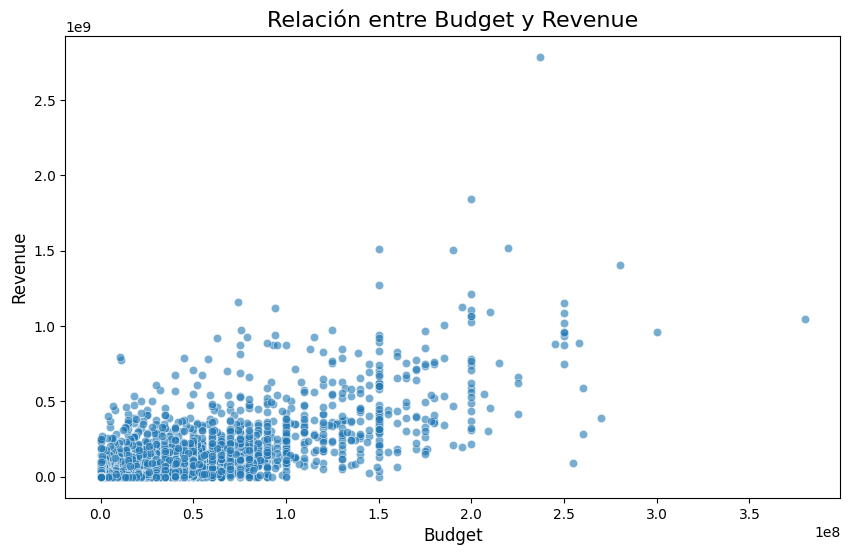

In [16]:
# Gráfico de dispersión entre 'budget' y 'revenue'
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.scatterplot(data=moviestmdb_df, x='budget', y='revenue', alpha=0.6)

# Añado etiquetas y título
plt.title('Relación entre Budget y Revenue', fontsize=16)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Muestro el gráfico
plt.show()

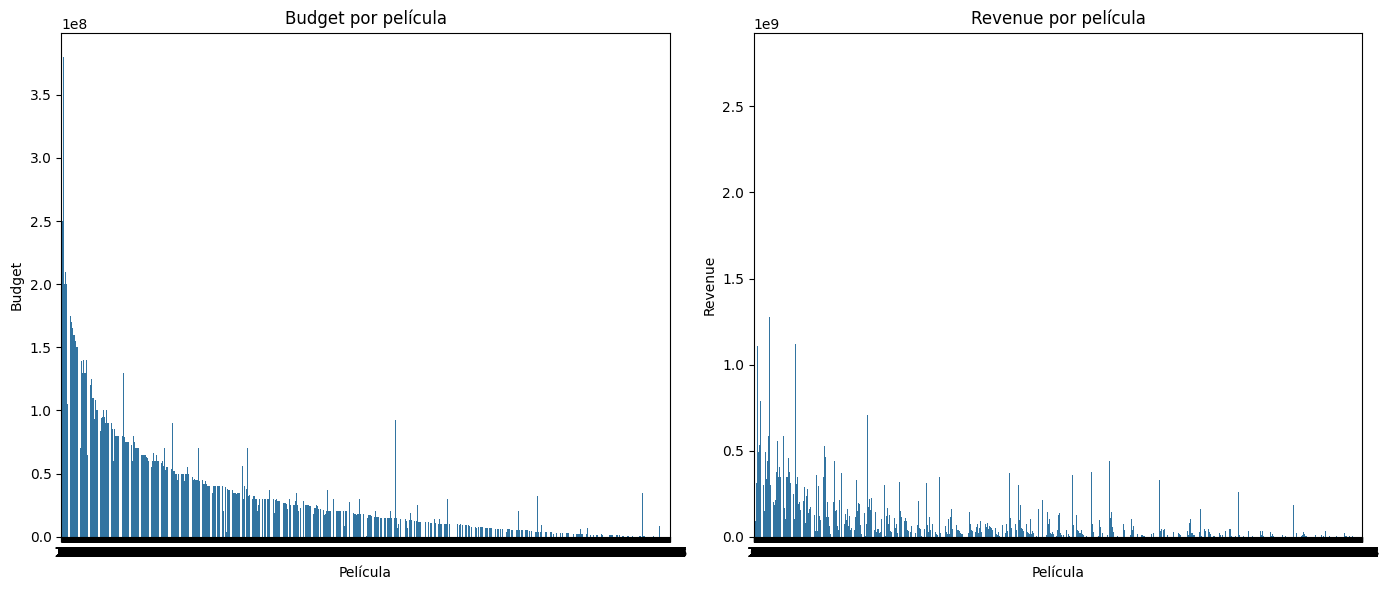

In [17]:
# Creo una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Gráfico de barras para el 'budget'
sns.barplot(data=moviestmdb_df, x=moviestmdb_df.index, y='budget', ax=axes[0])
axes[0].set_title('Budget por película')
axes[0].set_xlabel('Película')
axes[0].set_ylabel('Budget')

# Gráfico de barras para el 'revenue'
sns.barplot(data=moviestmdb_df, x=moviestmdb_df.index, y='revenue', ax=axes[1])
axes[1].set_title('Revenue por película')
axes[1].set_xlabel('Película')
axes[1].set_ylabel('Revenue')

plt.tight_layout()
plt.show()

#### **Relación de 'vote_count' y 'original_title' (30 películas más votadas)**

In [18]:
# Filtro los 'title' con mayor 'vote_count'
top_30_movies = moviestmdb_df[['title', 'vote_count']].sort_values(by='vote_count', ascending=False).head(25)
top_30_movies

,title,vote_count
96,Inception,13752
65,The Dark Knight,12002
0,Avatar,11800
16,The Avengers,11776
788,Deadpool,10995
95,Interstellar,10867
287,Django Unchained,10099
94,Guardians of the Galaxy,9742
426,The Hunger Games,9455
127,Mad Max: Fury Road,9427


/var/folders/m4/4mx3075j6459pp9gm5pk4tsc0000gn/T/ipykernel_1194/1118240711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_count', y='title', data=top_30_movies, palette='Purples_d')


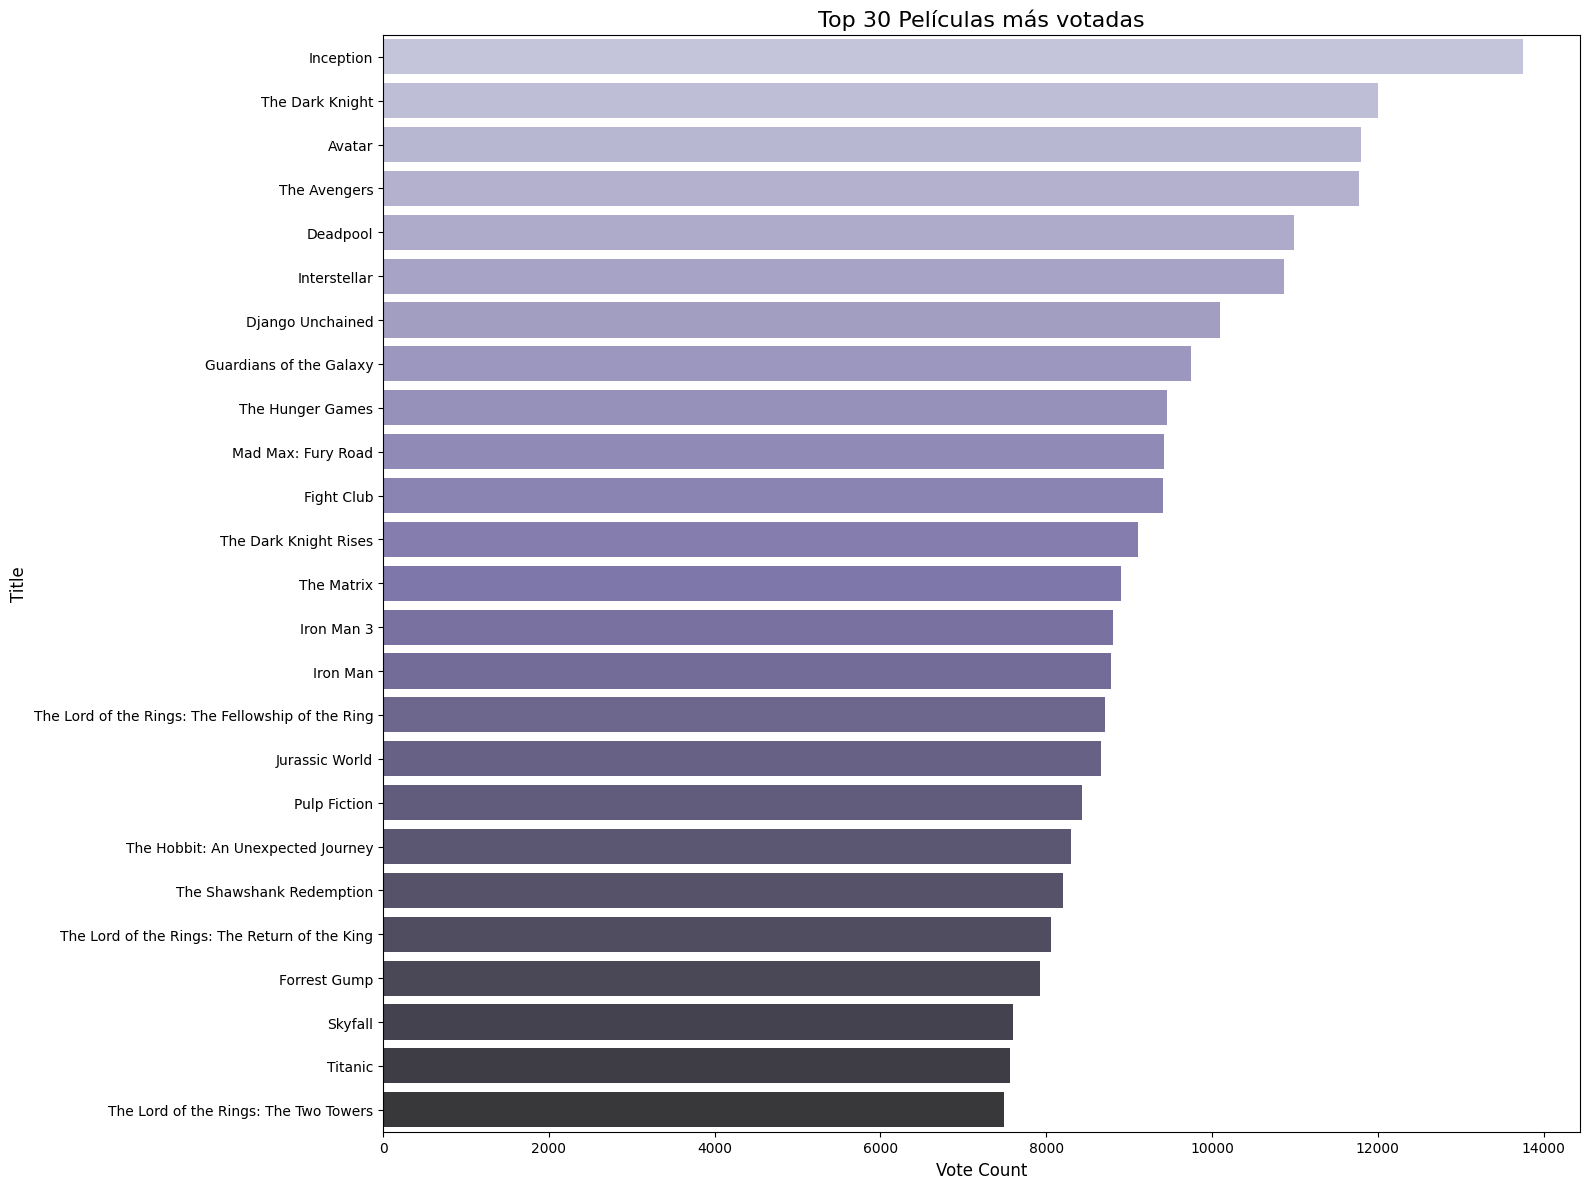

In [19]:
# Creo un gráfico de barras con seaborn
plt.figure(figsize=(16, 12))
sns.barplot(x='vote_count', y='title', data=top_30_movies, palette='Purples_d')

# Personalizo el gráfico
plt.title('Top 30 Películas más votadas', fontsize=16)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Title', fontsize=12)
plt.tight_layout()

# Muestro el gráfico
plt.show()

#### **Relación de 'vote_count' y 'popularity'**

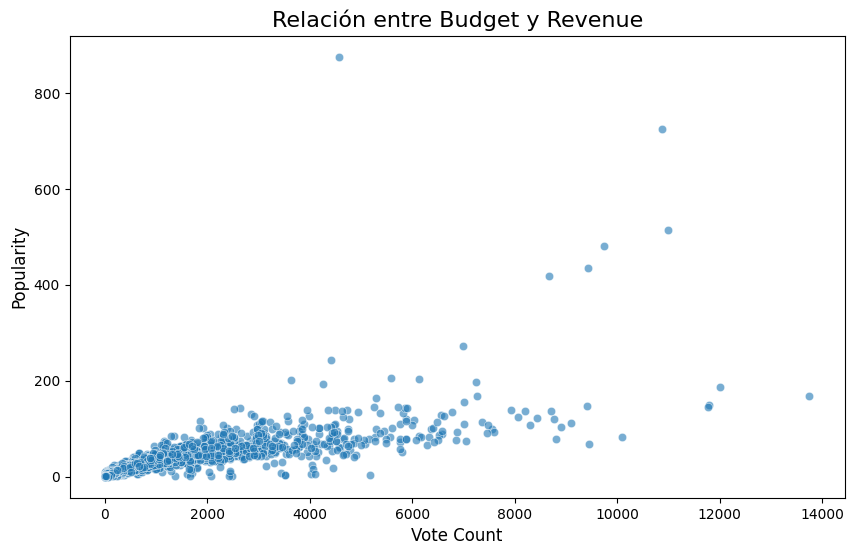

In [20]:
# Gráfico de dispersión entre 'vote_count' y 'popularity'
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.scatterplot(data=moviestmdb_df, x='vote_count', y='popularity', alpha=0.6)

# Añado etiquetas y título
plt.title('Relación entre Budget y Revenue', fontsize=16)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

# Muestro el gráfico
plt.show()

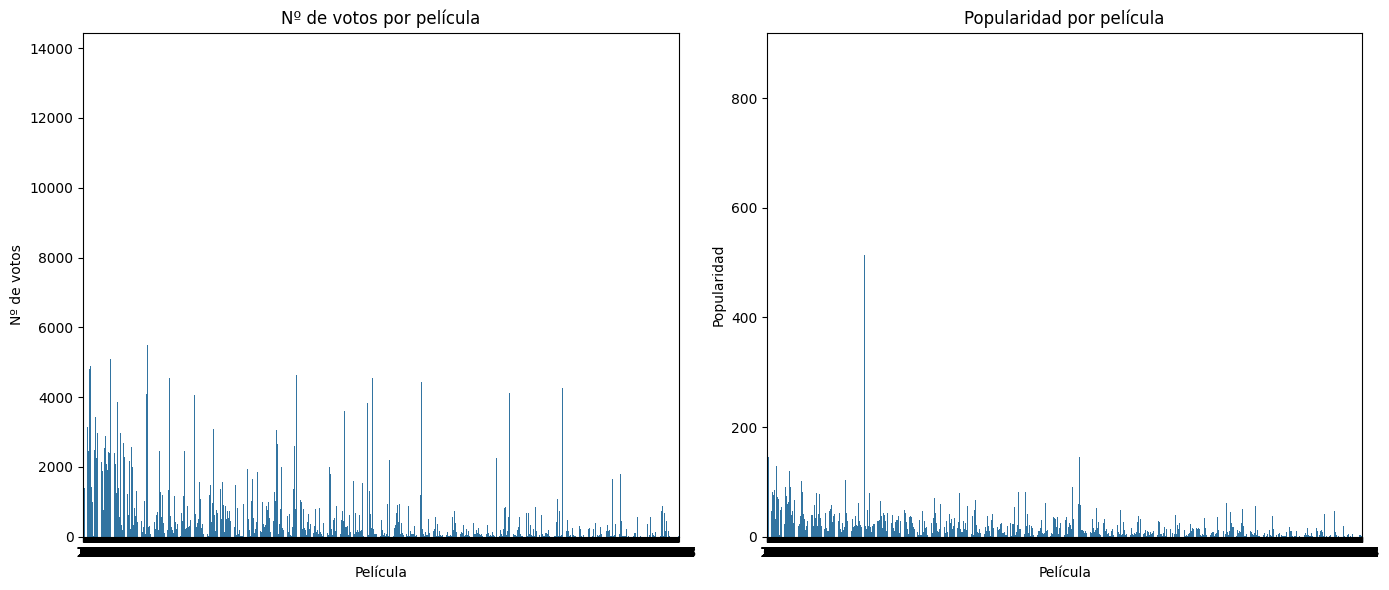

In [21]:
# Creo una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Gráfico de barras para el 'budget'
sns.barplot(data=moviestmdb_df, x=moviestmdb_df.index, y='vote_count', ax=axes[0])
axes[0].set_title('Nº de votos por película')
axes[0].set_xlabel('Película')
axes[0].set_ylabel('Nº de votos')

# Gráfico de barras para el 'revenue'
sns.barplot(data=moviestmdb_df, x=moviestmdb_df.index, y='popularity', ax=axes[1])
axes[1].set_title('Popularidad por película')
axes[1].set_xlabel('Película')
axes[1].set_ylabel('Popularidad')

plt.tight_layout()
plt.show()

## Limpieza del DataFrame

#### Elimino columnas que no son relevantes o con información duplicada 

In [22]:
# Columnas con información duplicada: 
# 'id' == 'movie_id
# 'original_title' == 'title' 

# Columnas no relevantes: 'homepage', 'original_language', 'spoken_languages', 'tagline'...

moviestmdb_df.drop(columns=['budget', 'homepage', 'id', 'original_language', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline','original_title'], inplace=True)

#### **Convierto columnas json en string**

In [23]:
# Importo librería 
import ast

In [24]:
# Función para parsear
def parse(data):
    try:
        return ast.literal_eval(data)
    except:
        return []

In [25]:
# Columna 'genres' 
moviestmdb_df['genres'] = moviestmdb_df['genres'].apply(parse)
moviestmdb_df['genres'] = moviestmdb_df['genres'].apply(
    lambda x: [item['name'] for item in x] if isinstance(x, list) else []
)
moviestmdb_df['genres'] = moviestmdb_df['genres'].astype(str)

# Colummna 'keywords' 
moviestmdb_df['keywords'] = moviestmdb_df['keywords'].apply(parse)
moviestmdb_df['keywords'] = moviestmdb_df['keywords'].apply(
    lambda x: [item['name'] for item in x] if isinstance(x, list) else []
)
moviestmdb_df['keywords'] = moviestmdb_df['keywords'].astype(str)

# Columna 'production_companies' 
#moviestmdb_df['production_companies'] = moviestmdb_df['production_companies'].apply(parse)
#moviestmdb_df['production_companies'] = moviestmdb_df['production_companies'].apply(
#  lambda x: [item['name'] for item in x] if isinstance(x, list) else []
#)
#moviestmdb_df['production_companies'] = moviestmdb_df['production_companies'].astype(str) 

# Columna 'production_countries' 
#moviestmdb_df['production_countries'] = moviestmdb_df['production_countries'].apply(parse)
#moviestmdb_df['production_countries'] = moviestmdb_df['production_countries'].apply(
#   lambda x: [item['name'] for item in x] if isinstance(x, list) else []
#)
#moviestmdb_df['production_countries'] = moviestmdb_df['production_countries'].astype(str) 

# Columna 'cast' 
moviestmdb_df['cast'] = moviestmdb_df['cast'].apply(parse)
moviestmdb_df['cast'] = moviestmdb_df['cast'].apply(
    lambda x: [item['name'] for item in x] if isinstance(x, list) else []
)
moviestmdb_df['cast'] = moviestmdb_df['cast'].astype(str) 

# Columna 'crew', de la que obtengo la nueva columna 'filmmaker'  
def get_director(crew_data):
    crew = parse(crew_data)
    for member in crew:
        if member.get('job') == 'Director':
            return member.get('name')
    return None
moviestmdb_df['filmmaker'] = moviestmdb_df['crew'].apply(get_director)
moviestmdb_df.drop('crew', axis=1, inplace=True)

In [26]:
# Verifico si hay nulos en la columna 'filmmaker'
print(moviestmdb_df["filmmaker"].isnull().sum())

30


In [27]:
titles_null_filmmaker = moviestmdb_df[moviestmdb_df['filmmaker'].isnull()][['title', 'popularity', 'vote_average','vote_count']]
print(titles_null_filmmaker)

                                                  title  popularity  \
3665                                          Flying By    1.546169   
3674                                    Running Forever    0.028756   
3734                                                Paa    2.126139   
3982                                 Boynton Beach Club    0.188870   
4073                                          Sharkskin    0.027801   
4110    The Book of Mormon Movie, Volume 1: The Journey    0.031947   
4123                             Hum To Mohabbat Karega    0.001186   
4128                                     Roadside Romeo    0.253595   
4252                              Me You and Five Bucks    0.094105   
4311                          Down & Out With The Dolls    0.002386   
4320                                          Crowsnest    0.057564   
4328                                 Sex With Strangers    0.014406   
4380                              Dream with the Fishes    0.948316   
4407  

In [28]:
# Como 17 es un número muy poco representativo del total y ninguna de estas películas resulta relevante, decido borrar las filas con valores nulos en 'filmmaker'
moviestmdb_df = moviestmdb_df.dropna(subset=["filmmaker"])

In [29]:
moviestmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4779 entries, 0 to 4808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        4779 non-null   object 
 1   keywords      4779 non-null   object 
 2   overview      4776 non-null   object 
 3   popularity    4779 non-null   float64
 4   title         4779 non-null   object 
 5   vote_average  4779 non-null   float64
 6   vote_count    4779 non-null   int64  
 7   movie_id      4779 non-null   int64  
 8   cast          4779 non-null   object 
 9   filmmaker     4779 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 410.7+ KB


#### **Columna 'genres'**

In [30]:
# Elimino los corchetes, los espacios en blanco y las comillas simples
moviestmdb_df['genres'] = moviestmdb_df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
# Divido la cadena en una lista con los elementos delimitados por comas
moviestmdb_df['genres'] = moviestmdb_df['genres'].str.split(',')

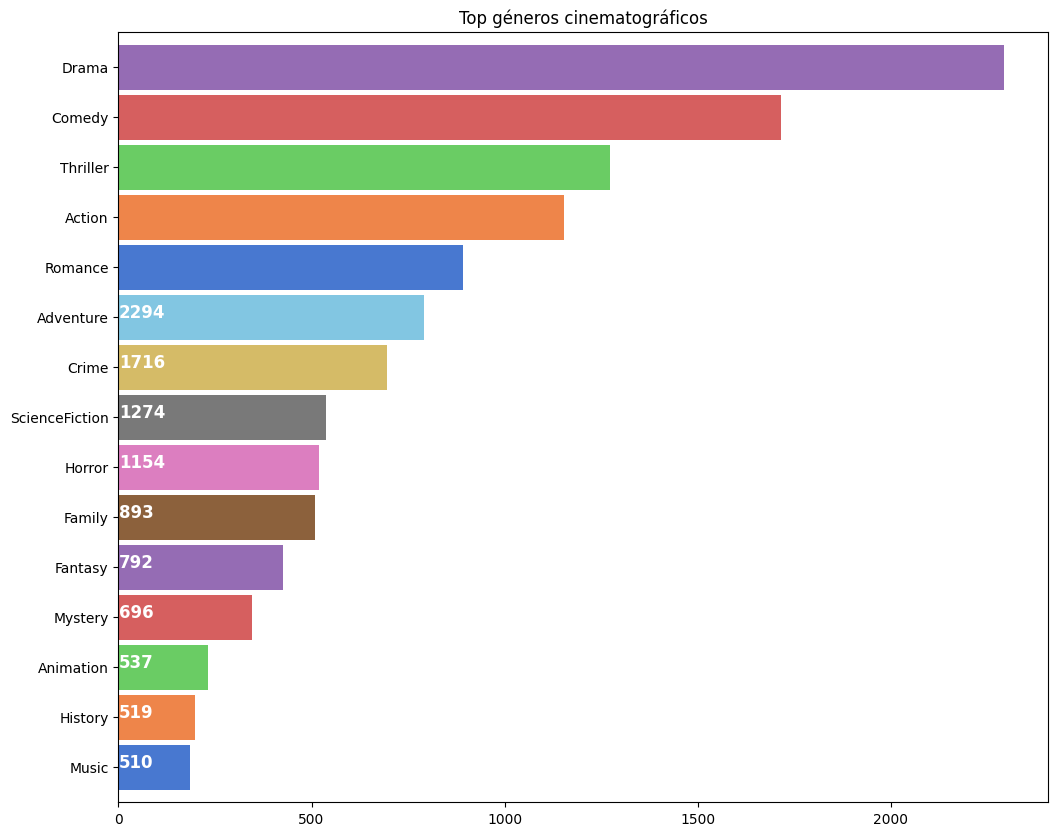

In [31]:
# 15 géneros más frecuentes
plt.subplots(figsize=(12,10))
list_genres = []
for i in moviestmdb_df['genres']:
    list_genres.extend(i)
ax = pd.Series(list_genres).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',10))
for i, v in enumerate(pd.Series(list_genres).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top géneros cinematográficos')
plt.show()

In [32]:
# Genero una lista para todos los posibles únicos valores de 'genre' mencionados en el dataset
genreList = []
for index, row in moviestmdb_df.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TVMovie',
 '']

In [33]:
# One Hot Encoding para múltiples etiquetas con la función binayr, que genera una lista de valores binario (1s y 0s)
# Cada género es comparado con una lista de géneros posibles ('genreList').
# Se genera una lista binaria donde 1 indica que el género está presente y 0 indica que no lo está.

def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

# Convierto una nueva lista de géneros en una lista binaria que indica qué géneros están presentes
# Almaceno el resultado en una nueva columna del DataFrame llamada 'genres_bin'
moviestmdb_df['genres_bin'] = moviestmdb_df['genres'].apply(lambda x: binary(x))
moviestmdb_df['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

#### **Columna 'keywords'**

In [34]:
# Investigando en kaggle, recomiendan estas tres librerías para manipular texto en Python
from wordcloud import WordCloud, STOPWORDS # Crea visualización de nubes de palabras a partir de su frecuencia
import nltk # Librería para el procesamiento de Lenguaje Natural (NLP)
from nltk.corpus import stopwords # Elimina palabras comunes que no son útiles para el análisis de texto, como artículos y preposiciones

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

In [36]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

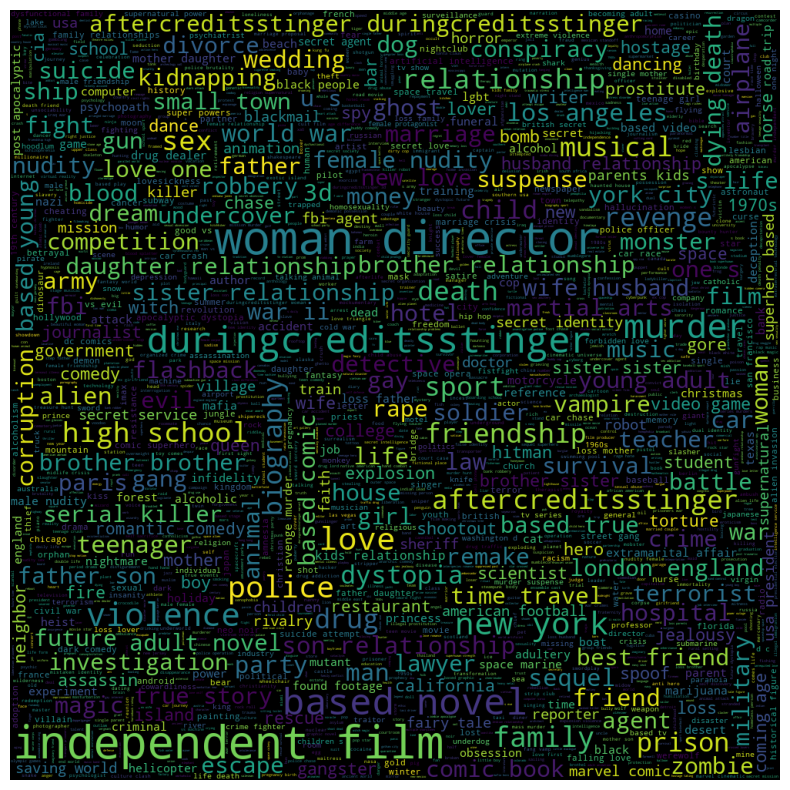

In [37]:
# Configuración de tamaño de la figura
plt.subplots(figsize=(12,12))

# Lista de stopwords
stop_words = set(stopwords.words('english'))
stop_words.update([',',';','!','?','.', '(', ')', '$', '#', '+', ':', '...', ' '])

# Tokenizar las palabras en la columna 'keywords' y luego aplanarlas en una lista
words = moviestmdb_df['keywords'].dropna().apply(nltk.word_tokenize)
word = []
for i in words:
    word.extend(i)

# Convertir la lista a minúsculas y filtrar las stopwords
word = [i.lower() for i in word if i.lower() not in stop_words]

# Crear la nube de palabras
wc = WordCloud(
    background_color="black", 
    max_words=2000, 
    stopwords=STOPWORDS, 
    max_font_size=60,
    width=1000,
    height=1000
)

# Generar la nube de palabras
wc.generate(" ".join(word))

# Mostrar la nube de palabras
plt.imshow(wc)
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [38]:
# Elimino los corchetes, los espacios en blanco y las comillas simples
moviestmdb_df['keywords'] = moviestmdb_df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
# Divido la cadena en una lista con los elementos delimitados por comas
moviestmdb_df['keywords'] = moviestmdb_df['keywords'].str.split(',')

In [39]:
# Convierto cada lista de diccionarios a su representación en string, eliminando caracteres como corchetes, espacios y comillas simples
# Ordeno las palabras clave alfabéticamente
# Divido el string en elementos de lista, las comas como separadores

for i,j in zip(moviestmdb_df['keywords'],moviestmdb_df.index):
    list2 = []
    list2 = i
    list2.sort() 
    moviestmdb_df.loc[j,'keywords'] = str(list2)
moviestmdb_df['keywords'] = moviestmdb_df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
moviestmdb_df['keywords'] = moviestmdb_df['keywords'].str.split(',')

In [40]:
# Genero una lista para todas las palabras clave únicas
wordsList = []
for index, row in moviestmdb_df.iterrows():
    genres = row["keywords"]
    
    for genre in genres: # Itera sobre cada palabra clave en la lista de 'genres' para esa fila
        if genre not in wordsList:
            wordsList.append(genre)

In [41]:
# One Hot Encoding para múltiples etiquetas con la función binayr, que genera una lista de valores binario (1s y 0s)
# Cada palabra es comparado con una lista de palabras posibles ('wordsList')
# Se genera una lista binaria donde 1 indica que la palabra clave está presente y 0 indica que no lo está

def binary(words):
    binaryList = []
    for genre in wordsList:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

# Almaceno el resultado en una nueva columna del DataFrame llamada 'words_bin'
moviestmdb_df['words_bin'] = moviestmdb_df['keywords'].apply(lambda x: binary(x))

#### **Columna 'cast'**

In [42]:
# Elimino los corchetes
moviestmdb_df['cast'] = moviestmdb_df['cast'].str.strip('[]')
# Corrijo casos donde Jr. está precedido por coma y espacio
moviestmdb_df['cast'] = moviestmdb_df['cast'].str.replace(', Jr.', ' Jr.')
# Elimino el espacio entre el nombre y Jr.
moviestmdb_df['cast'] = moviestmdb_df['cast'].str.replace(' Jr.', 'Jr.')
# # Elimino los corchetes, los espacios en blanco y las comillas
moviestmdb_df['cast'] = moviestmdb_df['cast'].str.replace(' ', '').str.replace("'", '').str.replace('"', '')
# Divido la cadena en una lista con los elementos delimitados por comas
moviestmdb_df['cast'] = moviestmdb_df['cast'].str.split(',')
# Expresión regular para separar palabras entre sí y palabras de puntos (.)
moviestmdb_df['cast'] = moviestmdb_df['cast'].apply(
    lambda lista_nombres: [
        re.sub(r'([a-zñáéíóúü])([A-ZÁÉÍÓÚÜ])|([.])([A-ZÁÉÍÓÚÜ])', 
               r'\1\3 \2\4', 
               nombre)
        for nombre in lista_nombres
    ]
)

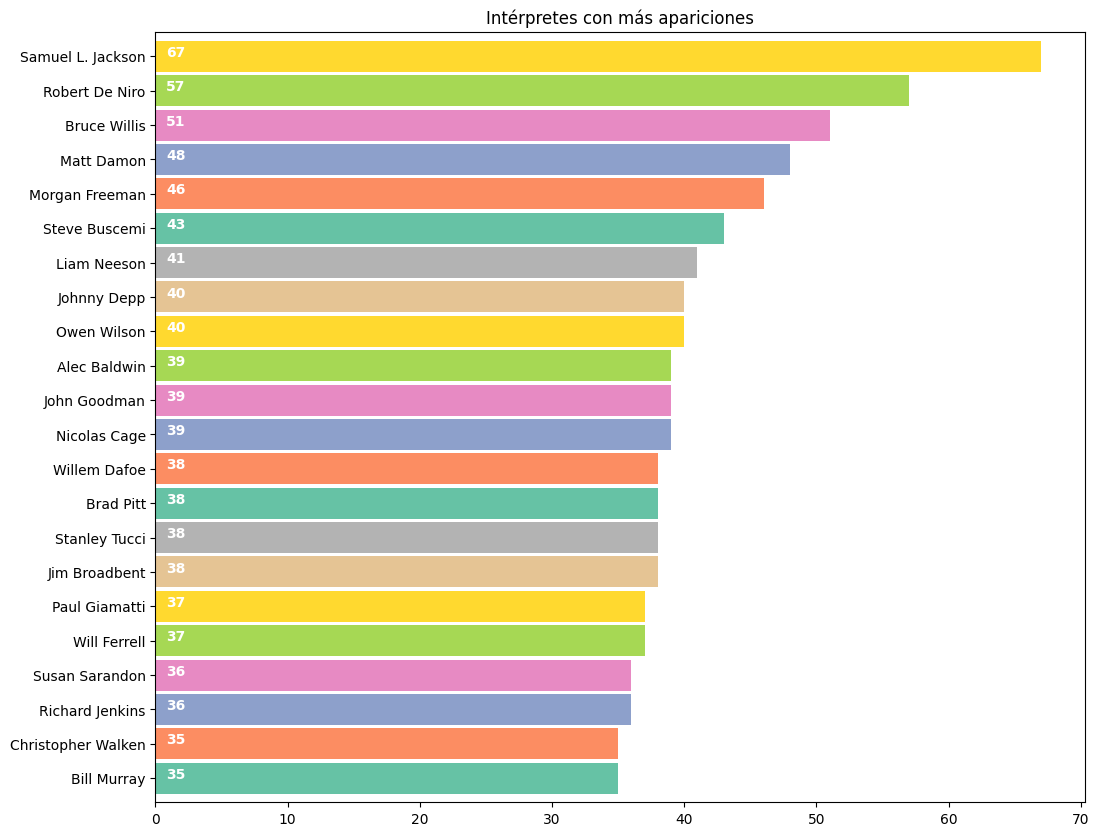

In [43]:
# 20 intérpretes que más aparecen
plt.subplots(figsize=(12,10))
list_cast=[]
for i in moviestmdb_df['cast']:
    list_cast.extend(i)
ax=pd.Series(list_cast).value_counts()[:22].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Set2',40))
for i, v in enumerate(pd.Series(list_cast).value_counts()[:22].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Intérpretes con más apariciones')
plt.show()

In [44]:
# Genero una lista para todos los posibles únicos valores de 'cast' mencionados en el dataset
castList = []
for index, row in moviestmdb_df.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [45]:
# One Hot Encoding para múltiples etiquetas con la función binary, que genera una lista de valores binario (1s y 0s)
# Cada intérprete es comparado con una lista de reparto posible ('castList').
# Se genera una lista binaria donde 1 indica que la actriz o actor está presente y 0 indica que no lo está.

def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

# Convierto una nueva lista de reparto en una lista binaria que indica qué actrices y actores están presentes
# Almaceno el resultado en una nueva columna del DataFrame llamada 'cast_bin'
moviestmdb_df['cast_bin'] = moviestmdb_df['cast'].apply(lambda x: binary(x))
moviestmdb_df['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: cast_bin, dtype: object

#### **Columnas 'vote_count' y 'vote_average'**

In [46]:
# Elimino las peliculas con 0 'vote_average' y que no incluyan el nombre del 'filmmaker'
moviestmdb_df = moviestmdb_df[(moviestmdb_df['vote_average']!=0)] 
moviestmdb_df = moviestmdb_df[moviestmdb_df['filmmaker']!='']

##### Antes de crear el modelo... ¿cómo podría definir cuántos votos como mínimo ha de tener una película para ser susceptible de recomendación? ¿y qué nota media?

In [47]:
vote_counts = moviestmdb_df[moviestmdb_df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = moviestmdb_df[moviestmdb_df['vote_average'].notnull()]['vote_average'].astype('int')

votos_minimos = vote_counts.quantile(0.6) # Establezco el percentil 60, es decir, que el número de votos esté por encima del 60% de las películas
print('nº de votos mínimos para ser recomendada:', votos_minimos)

nota_minima = vote_averages.mean()
print('nota mínima para ser recomendada:', round(nota_minima, 2))

nº de votos mínimos para ser recomendada: 380.0
nota mínima para ser recomendada: 5.73


## **Preprocesado parte 2 - Dataset movielens**

In [48]:
# Importo librerías iniciales
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

In [49]:
linksml_df = pd.read_csv('../data/01_raw/ml-32m/links.csv')
moviesml_df = pd.read_csv('../data/01_raw/ml-32m/movies.csv')
ratingsml_df = pd.read_csv('../data/01_raw/ml-32m/ratings.csv')
tagsml_df = pd.read_csv('../data/01_raw/ml-32m/tags.csv')

#### linksml_df 

In [50]:
linksml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  87585 non-null  int64  
 1   imdbId   87585 non-null  int64  
 2   tmdbId   87461 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB


In [51]:
linksml_df.head(20)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [52]:
linksml_df.drop(columns='imdbId', inplace=True)

In [53]:
linksml_df = linksml_df.dropna(subset=["tmdbId"])
linksml_df['tmdbId']= linksml_df['tmdbId'].astype(int)

In [54]:
linksml_df.head(10)

,movieId,tmdbId
0,1,862
1,2,8844
2,3,15602
3,4,31357
4,5,11862
5,6,949
6,7,11860
7,8,45325
8,9,9091
9,10,710


#### moviesml_df 

In [55]:
moviesml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [56]:
moviesml_df.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [57]:
# Extraigo el año del título y creo una nueva columna llamada 'year'
moviesml_df[['title', 'year']] = moviesml_df['title'].str.extract(r'^(.*) \((\d{4})\)$')
# Separo los géneros en una lista
moviesml_df['genres'] = moviesml_df['genres'].str.split(r'\|')

In [58]:
moviesml_df['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 87585 entries, 0 to 87584
Series name: year
Non-Null Count  Dtype 
--------------  ----- 
86808 non-null  object
dtypes: object(1)
memory usage: 684.4+ KB


In [59]:
# Elimino filas con valores nulos en la columna 'year'
moviesml_df = moviesml_df.dropna(subset=['year'])

In [60]:
# Convierto el dtype a 'int' para la columna 'year'
moviesml_df['year'] = moviesml_df['year'].astype(int)

#### ratingsml_df 

In [61]:
ratingsml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [62]:
ratingsml_df.head(20)

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
5,1,34,2.0,943228491
6,1,36,1.0,944249008
7,1,80,5.0,944248943
8,1,110,3.0,943231119
9,1,111,5.0,944249008


In [63]:
ratingsml_df.drop(columns='timestamp', inplace=True)

In [64]:
ratingsml_df.head(20)

,userId,movieId,rating
0,1,17,4.0
1,1,25,1.0
2,1,29,2.0
3,1,30,5.0
4,1,32,5.0
5,1,34,2.0
6,1,36,1.0
7,1,80,5.0
8,1,110,3.0
9,1,111,5.0


#### tagsml_df 

In [65]:
tagsml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000072 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 61.0+ MB


In [66]:
tagsml_df.head(20)

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102
5,34,8623,Steve Martin,1249808497
6,55,5766,the killls and the score,1319322078
7,58,7451,bullying,1672551536
8,58,7451,clique,1672551510
9,58,7451,coming of age,1672551502


In [67]:
tagsml_df.drop(columns='timestamp', inplace=True)

### Merges para dataset movielens

Este dataset lo voy a trabajar en dos líneas: una centrada en mi target, los ratings de cada usuario, y otra centrada en las películas. 

In [68]:
# Merge csvs movies y links
moviesml_df = pd.merge(moviesml_df, linksml_df, on='movieId', how='inner')

In [69]:
moviesml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86690 entries, 0 to 86689
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86690 non-null  int64 
 1   title    86690 non-null  object
 2   genres   86690 non-null  object
 3   year     86690 non-null  int64 
 4   tmdbId   86690 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.3+ MB


In [70]:
# Reordeno las columnas a mi conveniencia
moviesml_df = moviesml_df[['movieId', 'tmdbId', 'title', 'year', 'genres']]

In [71]:
moviesml_df.head(20)

,movieId,tmdbId,title,year,genres
0,1,862,Toy Story,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,8844,Jumanji,1995,"[Adventure, Children, Fantasy]"
2,3,15602,Grumpier Old Men,1995,"[Comedy, Romance]"
3,4,31357,Waiting to Exhale,1995,"[Comedy, Drama, Romance]"
4,5,11862,Father of the Bride Part II,1995,[Comedy]
5,6,949,Heat,1995,"[Action, Crime, Thriller]"
6,7,11860,Sabrina,1995,"[Comedy, Romance]"
7,8,45325,Tom and Huck,1995,"[Adventure, Children]"
8,9,9091,Sudden Death,1995,[Action]
9,10,710,GoldenEye,1995,"[Action, Adventure, Thriller]"


In [72]:
# Merge csvs moviesml (movies+links) y ratings. 'tagsml_df' la voy a dejar a un margen porque en principio no es 
# imprescindible al ceñirme para este nuevo modelo sólo en los ratings de los diferente usuarios. 
moviesml_df = ratingsml_df.merge(moviesml_df, on='movieId', how='left')


In [73]:
moviesml_df.head(20)

,userId,movieId,rating,tmdbId,title,year,genres
0,1,17,4.0,4584.0,Sense and Sensibility,1995.0,"[Drama, Romance]"
1,1,25,1.0,451.0,Leaving Las Vegas,1995.0,"[Drama, Romance]"
2,1,29,2.0,902.0,"City of Lost Children, The (Cité des enfants p...",1995.0,"[Adventure, Drama, Fantasy, Mystery, Sci-Fi]"
3,1,30,5.0,37557.0,Shanghai Triad (Yao a yao yao dao waipo qiao),1995.0,"[Crime, Drama]"
4,1,32,5.0,63.0,Twelve Monkeys (a.k.a. 12 Monkeys),1995.0,"[Mystery, Sci-Fi, Thriller]"
5,1,34,2.0,9598.0,Babe,1995.0,"[Children, Drama]"
6,1,36,1.0,687.0,Dead Man Walking,1995.0,"[Crime, Drama]"
7,1,80,5.0,46785.0,"White Balloon, The (Badkonake sefid)",1995.0,"[Children, Drama]"
8,1,110,3.0,197.0,Braveheart,1995.0,"[Action, Drama, War]"
9,1,111,5.0,103.0,Taxi Driver,1976.0,"[Crime, Drama, Thriller]"


In [74]:
moviesml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
 3   tmdbId   float64
 4   title    object 
 5   year     float64
 6   genres   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ GB


In [75]:
# Elimino filas con valores nulos en la columna 'year'
moviesml_df = moviesml_df.dropna(subset=['year'])

In [76]:
# Convierto el dtype a 'int' para la columna 'year'
moviesml_df['year'] = moviesml_df['year'].astype(int)

In [77]:
moviesml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31957771 entries, 0 to 32000203
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
 3   tmdbId   float64
 4   title    object 
 5   year     int64  
 6   genres   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ GB


In [78]:
# Convierto el dtype a 'int' para la columna 'tmdbId'
moviesml_df['tmdbId'] = moviesml_df['tmdbId'].astype(int)

In [79]:
moviesml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31957771 entries, 0 to 32000203
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
 3   tmdbId   int64  
 4   title    object 
 5   year     int64  
 6   genres   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.9+ GB


## **Preprocesado parte 3 - Unión de DataFrames tmdb y movielens**

Voy a revisar el actual dataframe de tmdb, con el que hiciera la 'demo' de mi aplicación 'PERESYS'.

In [80]:
moviestmdb_df

,genres,keywords,overview,popularity,title,vote_average,vote_count,movie_id,cast,filmmaker,genres_bin,words_bin,cast_bin
0,"[Action, Adventure, Fantasy, ScienceFiction]","[3d, alien, alienplanet, antiwar, battle, cgi,...","In the 22nd century, a paraplegic Marine is di...",150.437577,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[Adventure, Fantasy, Action]","[aftercreditsstinger, afterlife, alliance, cal...","Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[Action, Adventure, Crime]","[basedonnovel, britishsecretservice, mi6, secr...",A cryptic message from Bond’s past sends him o...,107.376788,Spectre,6.3,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[Action, Crime, Drama, Thriller]","[batman, burglar, catburglar, catwoman, cover-...",Following the death of District Attorney Harve...,112.312950,The Dark Knight Rises,7.6,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[Action, Adventure, ScienceFiction]","[19thcentury, 3d, alien, alienrace, basedonnov...","John Carter is a war-weary, former military ca...",43.926995,John Carter,6.1,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,"[Action, Crime, Thriller]","[arms, guitarcase, legs, paperknife, unitedsta...",El Mariachi just wants to play his guitar and ...,14.269792,El Mariachi,6.6,238,9367,"[Carlos Gallardo, Jaimede Hoyos, Peter Marquar...",Robert Rodriguez,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4805,"[Comedy, Romance]",[],A newlywed couple's honeymoon is upended by th...,0.642552,Newlyweds,5.9,5,72766,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",Edward Burns,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4806,"[Comedy, Drama, Romance, TVMovie]","[date, investigation, loveatfirstsight, narrat...","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"Signed, Sealed, Delivered",7.0,6,231617,"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",Scott Smith,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4807,[],[],When ambitious New York attorney Sam is sent t...,0.857008,Shanghai Calling,5.7,7,126186,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",Daniel Hsia,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [81]:
moviestmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4729 entries, 0 to 4808
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        4729 non-null   object 
 1   keywords      4729 non-null   object 
 2   overview      4727 non-null   object 
 3   popularity    4729 non-null   float64
 4   title         4729 non-null   object 
 5   vote_average  4729 non-null   float64
 6   vote_count    4729 non-null   int64  
 7   movie_id      4729 non-null   int64  
 8   cast          4729 non-null   object 
 9   filmmaker     4729 non-null   object 
 10  genres_bin    4729 non-null   object 
 11  words_bin     4729 non-null   object 
 12  cast_bin      4729 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 517.2+ KB


In [82]:
# Detecto que la columna 'movie_id' del dataset del dataframe moviestmdb es igual a la 'tmdbId' del dataframe moviesml, entonces haré que se llamen igual
moviestmdb_df.rename(columns={'movie_id': 'tmdbId'}, inplace=True)

In [83]:
# Elimino las columnas del moviestmdb que no voy a necesitar para este nuevo modelo 
peresys_df = moviestmdb_df
peresys_df.drop(columns=['genres_bin','words_bin','cast_bin','overview'], inplace=True)

In [84]:
# Hago un merge de los dos DataFrames
peresys_df = pd.merge(moviesml_df,peresys_df, on='tmdbId', how='inner')

In [85]:
peresys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805465 entries, 0 to 21805464
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   userId        int64  
 1   movieId       int64  
 2   rating        float64
 3   tmdbId        int64  
 4   title_x       object 
 5   year          int64  
 6   genres_x      object 
 7   genres_y      object 
 8   keywords      object 
 9   popularity    float64
 10  title_y       object 
 11  vote_average  float64
 12  vote_count    int64  
 13  cast          object 
 14  filmmaker     object 
dtypes: float64(3), int64(5), object(7)
memory usage: 2.4+ GB


De 31957771 de registros que teníamos pasamos a tener 21805465 al habernos quedado solamente con votos relativos a las 4729 películas del DataFrame de The Movie DataBase, por tanto se puede afirmar que esas 4729 películas representan un 68'23% de los votos registrados en el Dataset de MovieLens. 

In [86]:
# Valoro qué columnas manejan información duplicada tras el merge
peresys_df.head(20)
peresys_df.drop(columns=['title_x','genres_x'])

,userId,movieId,rating,tmdbId,year,genres_y,keywords,popularity,title_y,vote_average,vote_count,cast,filmmaker
0,1,17,4.0,4584,1995,"[Drama, Romance]","[basedonnovel, bowling, countrylife, decorum, ...",20.898711,Sense and Sensibility,7.2,352,"[Kate Winslet, Emma Thompson, Hugh Grant, Tom ...",Ang Lee
1,1,25,1.0,451,1995,"[Drama, Romance]","[alcohol, alcoholabuse, alcoholism, attempteds...",22.030517,Leaving Las Vegas,7.1,360,"[Nicolas Cage, Elisabeth Shue, Julian Sands, R...",Mike Figgis
2,1,34,2.0,9598,1995,"[Fantasy, Drama, Comedy, Family]","[affection, germanshepherd, grandson, heroism,...",34.366450,Babe,6.0,733,"[Christine Cavanaugh, Miriam Margolyes, Danny ...",Chris Noonan
3,1,36,1.0,687,1995,[Drama],"[begnadigung, charity, court, courtcase, cowar...",15.864928,Dead Man Walking,7.3,337,"[Susan Sarandon, Sean Penn, Robert Prosky, Ray...",Tim Robbins
4,1,110,3.0,197,1995,"[Action, Drama, History, War]","[idealism, independence, individual, inlovewit...",60.722162,Braveheart,7.7,3336,"[Mel Gibson, Catherine Mc Cormack, Sophie Marc...",Mel Gibson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21805460,200948,79702,4.5,22538,2010,"[Action, Adventure, Comedy]","[aftercreditsstinger, animatedflashback, chara...",38.885195,Scott Pilgrim vs. the World,7.2,2126,"[Michael Cera, Mary Elizabeth Winstead, Kieran...",Edgar Wright
21805461,200948,79796,1.0,23759,2010,"[Adventure, Action, Drama]","[ancientrome, ancientworld, behindenemylines, ...",22.708647,Centurion,5.9,386,"[Michael Fassbender, Olga Kurylenko, David Mor...",Neil Marshall
21805462,200948,80350,0.5,40264,2010,"[Horror, Comedy]","[duringcreditsstinger, highschool, horrorspoof...",17.165039,Vampires Suck,4.2,315,"[Chris Riggi, Matt Lanter, Jenn Proske, Ken Je...",Jason Friedberg
21805463,200948,80463,3.5,37799,2010,[Drama],"[arrogance, creator, deposition, entrepreneur,...",69.278220,The Social Network,7.1,3391,"[Jesse Eisenberg, Andrew Garfield, Justin Timb...",David Fincher


In [87]:
peresys_df.rename(columns={'title_y': 'title','genres_y':'genres'}, inplace=True)

In [88]:
# Reordeno las columnas a mi conveniencia
peresys_df = peresys_df[['userId', 'rating', 'movieId', 'tmdbId', 'title', 'year', 'genres', 'filmmaker', 'cast', 'keywords', 'vote_average', 'vote_count', 'popularity']]

In [89]:
peresys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805465 entries, 0 to 21805464
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   userId        int64  
 1   rating        float64
 2   movieId       int64  
 3   tmdbId        int64  
 4   title         object 
 5   year          int64  
 6   genres        object 
 7   filmmaker     object 
 8   cast          object 
 9   keywords      object 
 10  vote_average  float64
 11  vote_count    int64  
 12  popularity    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ GB


In [90]:
peresys_df.describe()

,userId,rating,movieId,tmdbId,year,vote_average,vote_count,popularity
count,2.180546e+07,2.180546e+07,2.180546e+07,2.180546e+07,2.180546e+07,2.180546e+07,2.180546e+07,2.180546e+07
mean,1.003242e+05,3.570234e+00,2.280517e+04,1.828152e+04,1.997559e+03,6.965923e+00,2.350963e+03,5.218985e+01
std,5.793031e+04,1.053666e+00,3.602443e+04,4.654365e+04,1.213441e+01,8.023428e-01,2.412394e+03,5.384619e+01
min,1.000000e+00,5.000000e-01,1.000000e+00,5.000000e+00,1.916000e+03,1.000000e+00,1.000000e+00,3.720000e-04
25%,5.013100e+04,3.000000e+00,1.233000e+03,5.950000e+02,1.994000e+03,6.400000e+00,5.830000e+02,2.198886e+01
50%,1.003650e+05,4.000000e+00,3.535000e+03,2.255000e+03,1.999000e+03,7.000000e+00,1.457000e+03,4.147240e+01
75%,1.503600e+05,4.000000e+00,3.918300e+04,1.056000e+04,2.005000e+03,7.600000e+00,3.395000e+03,6.726327e+01
max,2.009480e+05,5.000000e+00,2.777120e+05,4.264690e+05,2.017000e+03,1.000000e+01,1.375200e+04,8.755813e+02


In [91]:
peresys_df

,userId,rating,movieId,tmdbId,title,year,genres,filmmaker,cast,keywords,vote_average,vote_count,popularity
0,1,4.0,17,4584,Sense and Sensibility,1995,"[Drama, Romance]",Ang Lee,"[Kate Winslet, Emma Thompson, Hugh Grant, Tom ...","[basedonnovel, bowling, countrylife, decorum, ...",7.2,352,20.898711
1,1,1.0,25,451,Leaving Las Vegas,1995,"[Drama, Romance]",Mike Figgis,"[Nicolas Cage, Elisabeth Shue, Julian Sands, R...","[alcohol, alcoholabuse, alcoholism, attempteds...",7.1,360,22.030517
2,1,2.0,34,9598,Babe,1995,"[Fantasy, Drama, Comedy, Family]",Chris Noonan,"[Christine Cavanaugh, Miriam Margolyes, Danny ...","[affection, germanshepherd, grandson, heroism,...",6.0,733,34.366450
3,1,1.0,36,687,Dead Man Walking,1995,[Drama],Tim Robbins,"[Susan Sarandon, Sean Penn, Robert Prosky, Ray...","[begnadigung, charity, court, courtcase, cowar...",7.3,337,15.864928
4,1,3.0,110,197,Braveheart,1995,"[Action, Drama, History, War]",Mel Gibson,"[Mel Gibson, Catherine Mc Cormack, Sophie Marc...","[idealism, independence, individual, inlovewit...",7.7,3336,60.722162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21805460,200948,4.5,79702,22538,Scott Pilgrim vs. the World,2010,"[Action, Adventure, Comedy]",Edgar Wright,"[Michael Cera, Mary Elizabeth Winstead, Kieran...","[aftercreditsstinger, animatedflashback, chara...",7.2,2126,38.885195
21805461,200948,1.0,79796,23759,Centurion,2010,"[Adventure, Action, Drama]",Neil Marshall,"[Michael Fassbender, Olga Kurylenko, David Mor...","[ancientrome, ancientworld, behindenemylines, ...",5.9,386,22.708647
21805462,200948,0.5,80350,40264,Vampires Suck,2010,"[Horror, Comedy]",Jason Friedberg,"[Chris Riggi, Matt Lanter, Jenn Proske, Ken Je...","[duringcreditsstinger, highschool, horrorspoof...",4.2,315,17.165039
21805463,200948,3.5,80463,37799,The Social Network,2010,[Drama],David Fincher,"[Jesse Eisenberg, Andrew Garfield, Justin Timb...","[arrogance, creator, deposition, entrepreneur,...",7.1,3391,69.278220


In [92]:
# Actualizo el valor de 'vote_count' para cada película
peresys_df['vote_count'] = peresys_df.groupby('tmdbId')['tmdbId'].transform('size')

In [93]:
# Actualizo el valor de 'vote_average' para cada película
peresys_df['vote_average'] = peresys_df.groupby('tmdbId')['rating'].transform('mean').round(2)

In [94]:
# Actualizo el valor de 'popularity'
# Creo un DataFrame temporal con valores únicos de tmdbId y vote_count
temp_df = peresys_df[['tmdbId', 'vote_count']].drop_duplicates()

# Calculo el ranking de popularidad
temp_df['popularity'] = temp_df['vote_count'].rank(method='dense', ascending=False).astype(int)

# Elimino la columna 'popularity' original
if 'popularity' in peresys_df.columns:
    peresys_df.drop(columns='popularity', inplace=True)

# Fusiono la columna 'popularity' desde temp_df
peresys_df = peresys_df.merge(temp_df[['tmdbId', 'popularity']], on='tmdbId', how='left')

In [95]:
# Actualizo la revelancia de una película, por si más adelante precisara el dato
votos_minimos = peresys_df['vote_count'].quantile(0.6) # Establezco el percentil 60, es decir, que el número de votos esté por encima del 60% de las películas
print('nº de votos mínimos para ser recomendada:', votos_minimos)

nota_minima = peresys_df['vote_average'].mean()
print('nota mínima para ser recomendada:', round(nota_minima, 2))

nº de votos mínimos para ser recomendada: 21315.0
nota mínima para ser recomendada: 3.57


In [96]:
peresys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805465 entries, 0 to 21805464
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   userId        int64  
 1   rating        float64
 2   movieId       int64  
 3   tmdbId        int64  
 4   title         object 
 5   year          int64  
 6   genres        object 
 7   filmmaker     object 
 8   cast          object 
 9   keywords      object 
 10  vote_average  float64
 11  vote_count    int64  
 12  popularity    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 2.1+ GB


In [97]:
# Películas mejor valoradas
best_average_movies = peresys_df.drop_duplicates(subset='tmdbId')
top_10_ratings = best_average_movies.sort_values('vote_average', ascending=False).head(10)
# Selecciono solo las columnas relevantes (ej: título y popularidad)
top_10_ratings = top_10_ratings[['title', 'year', 'vote_average', 'vote_count']]

# Muestro resultado
print(top_10_ratings)

                            title  year  vote_average  vote_count
8751836      Fighting Tommy Riley  2005          5.00           1
9468780               A Fine Step  2014          5.00           1
9468774        This Thing of Ours  2005          5.00           1
8925027       In Her Line of Fire  2006          5.00           1
93       The Shawshank Redemption  1994          4.40      102929
160                 The Godfather  1972          4.32       66440
27                   12 Angry Men  1957          4.27       21863
367            The Usual Suspects  1995          4.27       67750
32         The Godfather: Part II  1974          4.26       43111
1662                Seven Samurai  1954          4.25       16531


In [98]:
print(peresys_df.isnull().sum())

userId          0
rating          0
movieId         0
tmdbId          0
title           0
year            0
genres          0
filmmaker       0
cast            0
keywords        0
vote_average    0
vote_count      0
popularity      0
dtype: int64


In [99]:
# Guardo peresys_df y lo convierto en un .csv
peresys_df.to_csv('peresys.csv', index=False)

Ahora sí, estamos en condiciones de crear un modelo que plasme mi objetivo, crear un sistema de recomendación de películas para nuevos usuarios a partir de las preferencias de otros usuarios. <br>

Para hacerlo más interactivo con la clase se me ocurre que habrá un input consistente en valorar las doce películas más populares del peresys_df, así el día de la presentación cada persona de la clase puede valorar una película. <br>

**El desarrollo de la práctica continúa en el notebook 'Peresys-modelsML.ipynb'**